# How much money did the first Pokemon game make compared to the other Pokemon games?


I will first collect data on how much money each Pokemon game made, and then I will compare the amount of money the first game made with the rest of the games using a histogram. This is an Observational study since I am not changing any variables to get different data. I won't be examining a sample, but all of the games released in the main series. 


In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
df_csv = pd.read_csv('pokemon.csv')

In [46]:
print(df_csv.head)

<bound method NDFrame.head of                                           Game Name  Unit Sales  \
0                      Pokemon Red, Green, and Blue  60,000,000   
1                                    Pokemon Yellow  14,640,000   
2                           Pokemon Gold and Silver  23,730,000   
3                                   Pokemon Crystal   6,390,000   
4                         Pokemon Ruby and Sapphire  16,220,000   
5                     Pokemon FireRed and LeafGreen  12,000,000   
6                                   Pokemon Emerald   7,060,000   
7                           Pokemon Diamond & Pearl  17,670,000   
8                                  Pokemon Platinum   7,600,000   
9                  Pokemon HeartGold and SoulSilver  12,720,000   
10                          Pokemon Black and White  15,640,000   
11                      Pokemon Black 2 and White 2   8,520,000   
12                                  Pokemon X and Y  16,720,000   
13            Pokemon Omega Ruby

In [47]:
std_by_type = df_csv.groupby('Game Type')['Gross Revenue '].std()
print("Standard Deviation:\n", std_by_type)

Standard Deviation:
 Game Type
Main    4.682641e+08
Name: Gross Revenue , dtype: float64


In [48]:
def iqr(series):
    return series.quantile(0.75) - series.quantile(0.25)

iqr_by_type = df_csv.groupby('Game Type')['Gross Revenue '].apply(iqr)
print("\nIQR:\n", iqr_by_type)



IQR:
 Game Type
Main    453000000.0
Name: Gross Revenue , dtype: float64


In [56]:
mean_by_type = df_csv.groupby('Game Type')['Gross Revenue '].mean()
print("\nMean:\n", mean_by_type)

median_by_type = df_csv.groupby('Game Type')['Gross Revenue '].median()
print("\nMedian:\n", median_by_type)



Mean:
 Game Type
Main    8.226190e+08
Name: Gross Revenue , dtype: float64

Median:
 Game Type
Main    763000000.0
Name: Gross Revenue , dtype: float64


/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


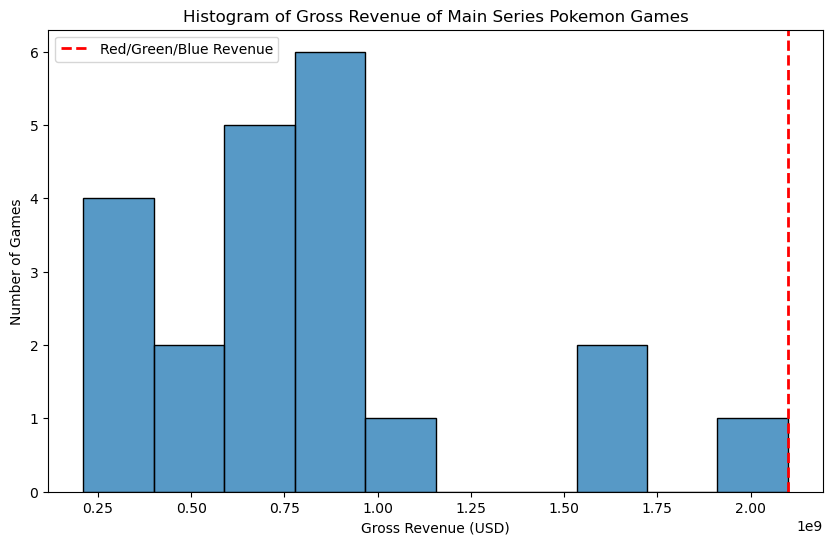

In [65]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_csv, x='Gross Revenue ', hue='Game Type', multiple='stack', bins=10, kde=False)

first_game_revenue = df_csv.loc[df_csv["Game Name"]=="Pokemon Red, Green, and Blue", "Gross Revenue "].values[0]
plt.axvline(first_game_revenue, color='red', linestyle='--', linewidth=2, label="Red/Green/Blue Revenue")

plt.title("Histogram of Gross Revenue of Main Series Pokemon Games")
plt.xlabel("Gross Revenue (USD)")
plt.ylabel("Number of Games")
plt.legend()
plt.show()

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


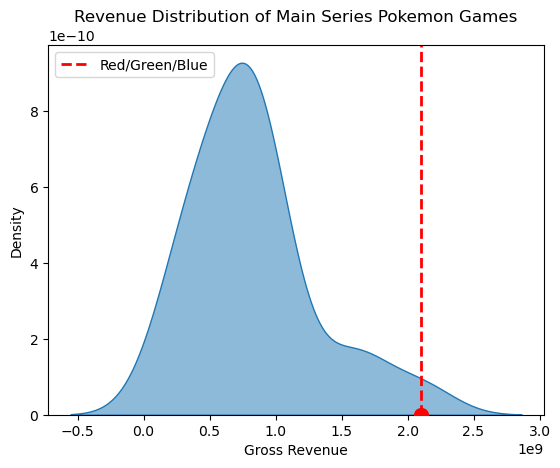

In [68]:
sns.kdeplot(data=df_csv, x='Gross Revenue ', hue='Game Type', fill=True, common_norm=False, alpha =0.5)

first_game_revenue = df_csv.loc[
    df_csv["Game Name"] == "Pokemon Red, Green, and Blue",
    "Gross Revenue "
].values[0]

plt.axvline(first_game_revenue, color='red', linestyle='--', linewidth=2, label="Red/Green/Blue")

plt.scatter(first_game_revenue, 0, color='red', s=100, zorder=5)

plt.title("Revenue Distribution of Main Series Pokemon Games")
plt.xlabel("Gross Revenue")
plt.ylabel("Density")
plt.legend()
plt.show()

The first Pokemon game (Pokemon Red/Green/Blue), made the most money compared to all the other Main Series Pokemon Games. It is the only Pokemon game which has surpassed 2 billion dollars.